In [1]:
# Using information from Kaggle kernels, lets investigate some things 

In [2]:
import pandas as pd 
import numpy as np 

import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
sns.set_style("white")

In [3]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [4]:
train.head(4)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street


In [5]:
# we are focusin specifically on the building ID and the managers ID 

In [6]:
# what are some useful information we can use for our models? 

In [34]:
print len(train['manager_id'].unique())
#3481 unique managers, how many listings in total? 

print train.shape[0]

# there are 3481 for almost 50,000 listings

# average listing per manager 
man_avg = train.shape[0] / float(len(train['manager_id'].unique()))

print ("the average number of listings per manager is {:.3f}".format(man_avg))

3481
49352
the average number of listings per manager is 14.178


In [39]:
# see how many managers we have in each dataset 
man_train_list = train['manager_id'].unique()
man_test_list = test['manager_id'].unique()

print 'Train :{}'.format(len(man_train_list))
print 'Test  :{}'.format(len(man_test_list))

Train :3481
Test  :3851


In [40]:
# find how many entries each manager is responsible for 

In [53]:
temp1 = train.groupby('manager_id').count().iloc[:,-1]
temp2 = test.groupby('manager_id').count().iloc[:,-1]

managers = pd.concat([temp1, temp2], join = 'outer', axis = 1)
managers.columns = ['train_count','test_count']

In [58]:
# sort by ascending 
print(managers.sort_values(by='train_count', ascending = False).head(10))

                                  train_count  test_count
e6472c7237327dd3903b3d6f6a94515a       2533.0      3854.0
6e5c10246156ae5bdcd9b487ca99d96a        711.0       972.0
8f5a9c893f6d602f4953fcc0b8e6e9b4        410.0       601.0
62b685cc0d876c3a1a51d63a0d6a8082        402.0       554.0
cb87dadbca78fad02b388dc9e8f25a5b        373.0       598.0
9df32cb8dda19d3222d66e69e258616b        330.0       532.0
b7de4cb395920136663132057fa89d84        320.0       529.0
2aa9bfa5f67ed9997ea341dee8a3a271        316.0       537.0
ad3d8ddc52c7e0859b5c6c7f7949c3bd        305.0       427.0
c9c33695ee2a2f818e9f1d8f7d1c4b39        299.0       432.0


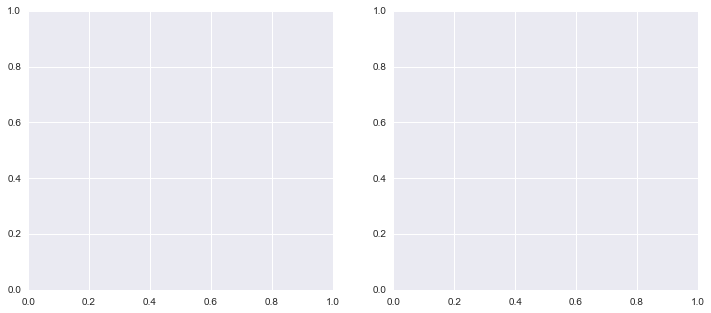

In [59]:
# look at cumulative distribution 

fig, axes = plt.subplots(1,2, figsize = (12, 5))

temp1 = managers['train_count'].dropna().sort_values(ascending = False).reset_index(drop = True)



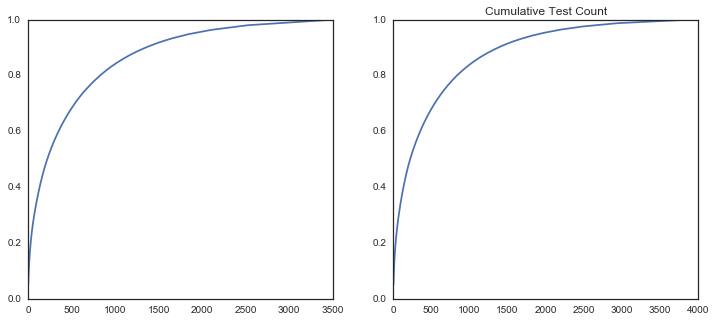

In [66]:
fig, axes = plt.subplots(1,2, figsize = (12, 5))

axes[0].plot(temp1.index + 1, temp1.cumsum()/temp1.sum())

temp2 = managers['test_count'].dropna().sort_values(ascending = False).reset_index(drop = True)
axes[1].plot(temp2.index + 1, temp2.cumsum() / temp2.sum())

axes[1].set_title('Cumulative Test Count')

In [72]:
# Pareto principle, where 20% of managers are responsible for ~80% of the total listings 

ix20 = int(len(managers['test_count'].dropna()) * 0.2)
# percentage 

va20 =( managers['test_count'].dropna().sort_values(ascending = False).cumsum().iloc[ix20] / managers['test_count'].sum() * 100)

In [75]:
print 'TEST: 20 %({}) of managers are responsible for {:.2f}% of listings'.format(ix20, va20)

TEST: 20 %(770) of managers are responsible for 78.24% of listings


In [78]:
# find out the number of unique managers in each of the files 
# you can make a set (one way), another way is to count the number of null values 

print managers[managers['test_count'].isnull() == True].count()[0]
managers[managers['train_count'].isnull() == True].count()[1]

# 548 that were in train but not in test 
# 918 that were in test, but not in train 


548


918

In [81]:
# find correlation between them train_count and test_count 

managers.sort_values(by='train_count' , ascending = False).corr()


,train_count,test_count
train_count,1.000000,0.995633
test_count,0.995633,1.000000


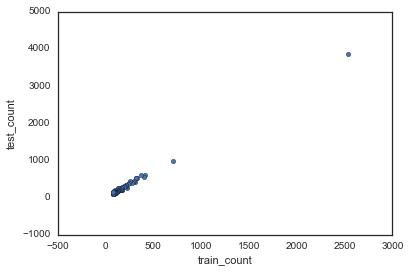

In [83]:
# look at the correlation between the two varaibles (train and test )

# plot scatter 
managers.sort_values(by = 'train_count', ascending = False).head(100).plot.scatter(x = 'train_count', y = 'test_count')

In [88]:
# how much cumulative sum do the managers make up (top 100, top 1000? )

# how do we tackle this problem 


temp = managers['train_count'].sort_values(ascending = False).head(100)

temp = pd.concat([temp, temp.cumsum()/managers['train_count'].sum() * 100], axis = 1).reset_index()

temp.columns = (['manager_id', 'count', 'percentage'])

print temp


# see 1000 managers 



                          manager_id   count  percentage
0   e6472c7237327dd3903b3d6f6a94515a  2533.0    5.132517
1   6e5c10246156ae5bdcd9b487ca99d96a   711.0    6.573189
2   8f5a9c893f6d602f4953fcc0b8e6e9b4   410.0    7.403955
3   62b685cc0d876c3a1a51d63a0d6a8082   402.0    8.218512
4   cb87dadbca78fad02b388dc9e8f25a5b   373.0    8.974307
5   9df32cb8dda19d3222d66e69e258616b   330.0    9.642973
6   b7de4cb395920136663132057fa89d84   320.0   10.291376
7   2aa9bfa5f67ed9997ea341dee8a3a271   316.0   10.931675
8   ad3d8ddc52c7e0859b5c6c7f7949c3bd   305.0   11.549684
9   c9c33695ee2a2f818e9f1d8f7d1c4b39   299.0   12.155536
10  1fb46c4a72bcf764ac35fc23f394760d   289.0   12.741125
11  d2bce61e0e0079ebdc8c281e415e045b   276.0   13.300373
12  5599e962719af3ccc2976855c2d5893c   256.0   13.819095
13  aa9e353a6b43b125cbc89cb751090a9e   246.0   14.317556
14  62826f3ae01f2ddc93b9cd28c659ab2b   233.0   14.789674
15  8b53ccf4338806ab1be3dd0267711649   222.0   15.239504
16  612a00076aefe8c98d1df483564

In [92]:
# lets look at these managers' interest level for each of the 100 managers 
man_list = managers['train_count'].sort_values(ascending = False).head(100).index

ixes = train.manager_id.isin(man_list)
df100 = train[ixes][['manager_id','interest_level']]

interest_dummies = pd.get_dummies(df100.interest_level)
df100 = pd.concat([df100,interest_dummies[['low','medium','high']]], axis = 1).drop('interest_level', axis = 1)

In [93]:
print("The top100 contributors account for {} entries\n".format(len(df100)))

print(df100.head(10))

The top100 contributors account for 17472 entries

                              manager_id  low  medium  high
10      5ba989232d0489da1b5f2c45f6688adc  0.0     1.0   0.0
10000   7533621a882f71e25173b27e3139d83d  1.0     0.0   0.0
100004  d9039c43983f6e564b1482b273bd7b01  0.0     0.0   1.0
100007  1067e078446a7897d2da493d2f741316  1.0     0.0   0.0
100014  b209e2c4384a64cc307c26759ee0c651  0.0     1.0   0.0
100020  e6472c7237327dd3903b3d6f6a94515a  1.0     0.0   0.0
100026  c1a6598437b7db560cde66e5a297a53f  0.0     1.0   0.0
100044  537e06890f6a86dbb70c187db5be4d55  0.0     0.0   1.0
100051  dbbb6b990661b1e507a387f019bcb1a0  0.0     1.0   0.0
100055  8f5a9c893f6d602f4953fcc0b8e6e9b4  1.0     0.0   0.0


In [95]:
df100.groupby('manager_id').count().sort_values(by='low', ascending = False)

,low,medium,high
manager_id,,,
e6472c7237327dd3903b3d6f6a94515a,2533,2533,2533
6e5c10246156ae5bdcd9b487ca99d96a,711,711,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,410,410,410
62b685cc0d876c3a1a51d63a0d6a8082,402,402,402
cb87dadbca78fad02b388dc9e8f25a5b,373,373,373
9df32cb8dda19d3222d66e69e258616b,330,330,330
b7de4cb395920136663132057fa89d84,320,320,320
2aa9bfa5f67ed9997ea341dee8a3a271,316,316,316
ad3d8ddc52c7e0859b5c6c7f7949c3bd,305,305,305
